In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataframe = pd.read_csv('credit_risk_dataset.csv')

In [3]:
print(dataframe.head().T)

                                   0          1         2        3        4
person_age                        22         21        25       23       24
person_income                  59000       9600      9600    65500    54400
person_home_ownership           RENT        OWN  MORTGAGE     RENT     RENT
person_emp_length              123.0        5.0       1.0      4.0      8.0
loan_intent                 PERSONAL  EDUCATION   MEDICAL  MEDICAL  MEDICAL
loan_grade                         D          B         C        C        C
loan_amnt                      35000       1000      5500    35000    35000
loan_int_rate                  16.02      11.14     12.87    15.23    14.27
loan_status                        1          0         1        1        1
loan_percent_income             0.59        0.1      0.57     0.53     0.55
cb_person_default_on_file          Y          N         N        N        Y
cb_person_cred_hist_length         3          2         3        2        4


In [4]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [5]:
print(dataframe[['person_age', 'person_income', 'loan_amnt']].describe())

         person_age  person_income     loan_amnt
count  32581.000000   3.258100e+04  32581.000000
mean      27.734600   6.607485e+04   9589.371106
std        6.348078   6.198312e+04   6322.086646
min       20.000000   4.000000e+03    500.000000
25%       23.000000   3.850000e+04   5000.000000
50%       26.000000   5.500000e+04   8000.000000
75%       30.000000   7.920000e+04  12200.000000
max      144.000000   6.000000e+06  35000.000000


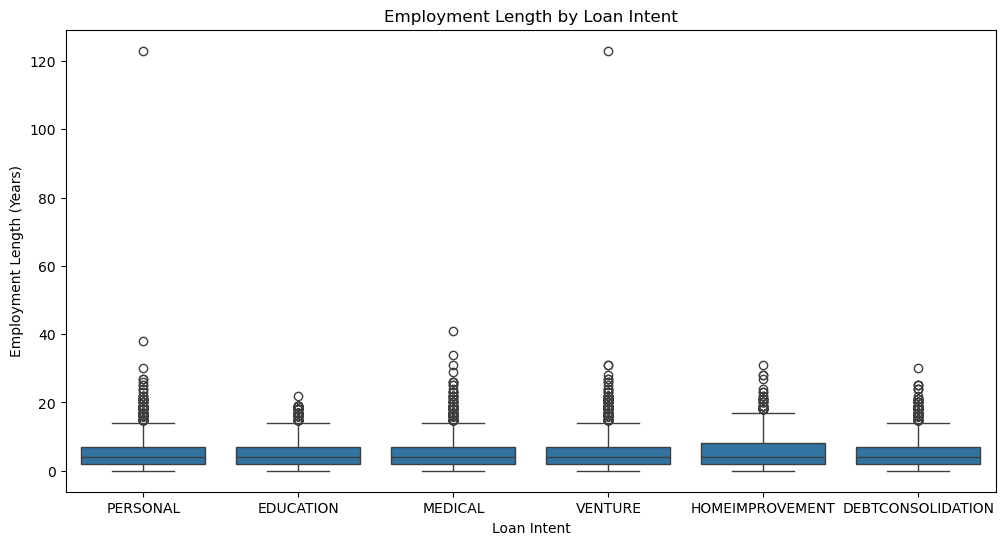

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_intent', y='person_emp_length', data=dataframe)
plt.title('Employment Length by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Employment Length (Years)')
plt.show()

In [7]:
cross_tab = pd.crosstab(dataframe['loan_grade'], dataframe['loan_status'])
# cross_tab = pd.crosstab(dataframe['person_emp_length'], dataframe['loan_status'])
# cross_tab = pd.crosstab(dataframe['person_age'], dataframe['cb_person_cred_hist_length'])
print(cross_tab)

loan_status     0     1
loan_grade             
A            9704  1073
B            8750  1701
C            5119  1339
D            1485  2141
E             343   621
F              71   170
G               1    63


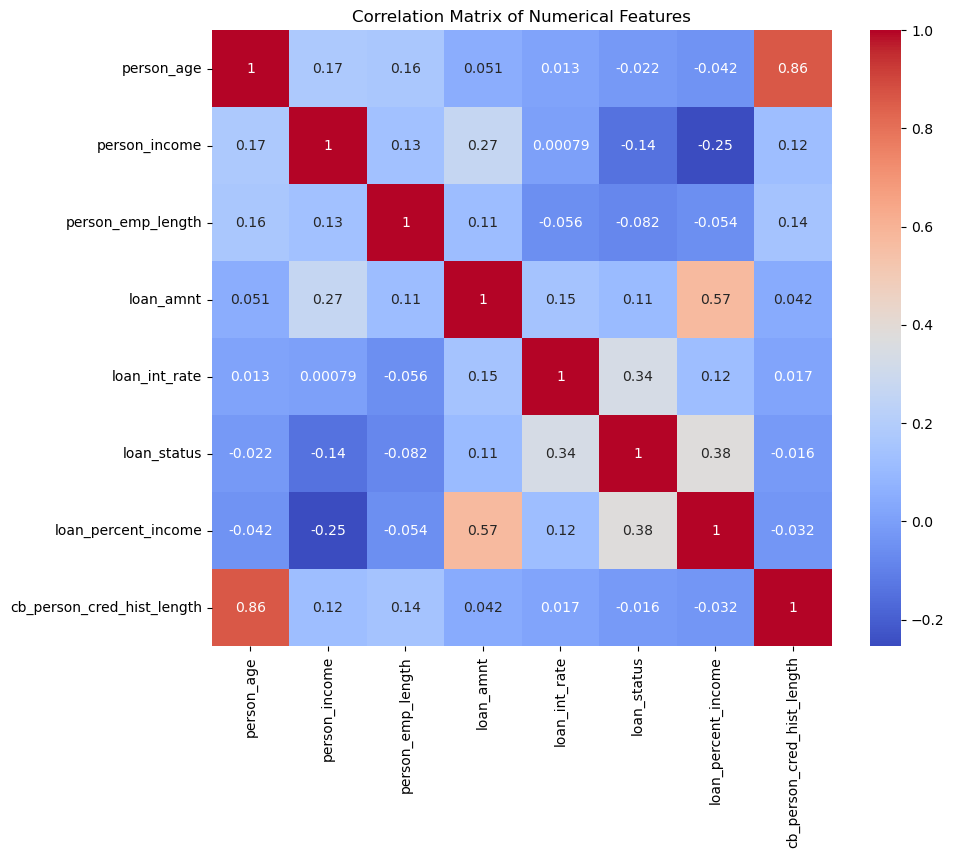

In [8]:
numerical_dataframe = dataframe.select_dtypes(include=['number']) 
correlation_matrix = numerical_dataframe.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [9]:
print(dataframe.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [10]:
from sklearn.impute import KNNImputer

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # Hyperparamter 

# Select only numerical features for imputation
numerical_features = dataframe.select_dtypes(include=['number'])

# Fit and transform the data
df_imputed = imputer.fit_transform(numerical_features)

# Convert back to DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=numerical_features.columns)

# Update the 'loan_int_rate' column in the original DataFrame
dataframe['loan_int_rate'] = df_imputed['loan_int_rate']

In [11]:
dataframe['person_emp_length'].fillna(0, inplace=True)

C:\Users\phanb\AppData\Local\Temp\ipykernel_23428\2770332787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['person_emp_length'].fillna(0, inplace=True)


In [12]:
print(dataframe.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(dataframe[categorical_features])
encoded_df = pd.DataFrame(encoded_features)
numerical_features = dataframe.select_dtypes(include=['number']).drop(columns=['loan_status'])  

X = pd.concat([numerical_features, encoded_df], axis=1)
y = dataframe['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_subtrain.shape, X_valid.shape, y_subtrain.shape, y_valid.shape)

(26064, 26) (6517, 26) (26064,) (6517,)
(20851, 26) (5213, 26) (20851,) (5213,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Create base models
# logisticRegression_model = LogisticRegression()
# decisionTree_model = DecisionTreeClassifier()
# randomForest_model = RandomForestClassifier()

X_subtrain.columns = X_subtrain.columns.astype(str)
X_valid.columns = X_valid.columns.astype(str)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Decision Tree Classifer
# decisionTree_model = DecisionTreeClassifier()
# decisionTree_model.fit(X_subtrain, y_subtrain)
# y_pred = decisionTree_model.predict(X_valid)

# Random Forest Classifer
# randomForest_model = RandomForestClassifier()
# randomForest_model.fit(X_subtrain, y_subtrain)
# y_pred = randomForest_model.predict(X_valid)


# K-Nearest neighbors 
# knn_model = KNeighborsClassifier()
# knn_model.fit(X_subtrain, y_subtrain)
# y_pred = knn_model.predict(X_valid)

# Gradient Boosting Machine
xgb_model = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
# randomized_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy')

grid_search.fit(X_subtrain, y_subtrain)

best_params = grid_search.best_params_  # Or randomized_search.best_params_
best_xgb_model = grid_search.best_estimator_  # Or randomized_search.best_estimator_

best_xgb_model.fit(X_subtrain, y_subtrain)
y_pred = best_xgb_model.predict(X_valid)


# Create the ensemble model (voting classifier)
# ensemble = VotingClassifier(estimators=[('lr', logisticRegression_model), ('dt', decisionTree_model), ('rf', randomForest_model)], voting='hard')
# ensemble.fit(X_subtrain, y_subtrain)

# X_valid.columns = X_valid.columns.astype(str)
# y_pred = ensemble.predict(X_valid)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8143
Precision: 0.6800
Recall: 0.2708
F1 Score: 0.3873
